# Bivariate KDE Plotter
Spaghetti Coder: Cullen Kortyna
    
Hello! And welcome to this humble Python Notebook. Below is some spaghetti code designed to plot x-y data, make multiple bivariate kernel density estimates of those data, and plot it all on the same x and y axes with some degree of useful customization.
    
Updates will be hosted at www.github.com/cdkortyna

# Libraries Import Step
In the cell below, you will import various Python libraries from your Anaconda package. They have various built-in functions that we will be leveraging for this notebook.

NumPy: Is the fundamental scientific computing library for Python. Also deals with n-dimensional arrays and stuff.

Pandas: Pandas is a fast and user-friendly library for importing and manipulating data. Their fundamental tool is the DataFrame, which imports your data as an easily manipulatable series of rows and columns.

Seaborn: Seaborn is the statistics and data visualization library this notebook will be using. It is built on Matplotlib, and closely integrated with Pandas data structures.

Matplotlib: Matplotlib is the standard Python 2D plotting library, that allows you to built publication-quality plots with ever-increasing customization options.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Loading Step

Import your data using the functions below.

xl = pd.ExcelFile("") reads in the excel file. Use the full file path name to the excel sheet you want to load.

df = xl.parse("") creates a DataFrame out of the excel sheet of your choice.

df[:5] lists the first 5 rows of your DataFrame. This is useful as a check to make sure your data loaded the way you expected.

In [28]:
xl = pd.ExcelFile(r"C:/Users/culle/Documents/Data/LAICPMS_Data/Kortyna_TO_30DISC_2Sig_Core_Rim_Jupyter.xlsx")
df = xl.parse("ZrUPb")
df[:5]

,Unnamed: 0,Sample_ID,Formation,Age,Grain_ID,Analysis_ID,U_ppm,U_Th,BestAge_Rim,BestAge_err_Rim,...,RimCore,Sample_ID.1,Grain_ID.1,Analysis_ID.1,U_ppm.1,U_Th.1,BestAge_Core,BestAge_err_Core,Disc.1,RimCore.1
0,NaN,16TO-02,Javelina,Maastrichtian,16To_02_53.FIN2,16To_02_53.FIN2,385.0,1.871,100.1,3.9,...,Rim,16TO-02,16To_02_53.FIN2,16To_02_53.FIN2,245.6,1.871,117.9,2.7,1.995012,Core
1,NaN,16TO-03,Lower Black Peaks,Paleocene,16TO-03_70.FIN2,16TO-03_70.FIN2,87.5,3.960,103.3,5.3,...,Rim,16TO-03,16TO-03_70.FIN2,16TO-03_70.FIN2,141.8,2.164,166.9,4.4,3.024691,Core
2,NaN,16TO-04,Lower Black Peaks,Paleocene,16To_04_39.FIN2,16To_04_39.FIN2,385.0,2.059,397.0,14.0,...,Rim,16TO-04,16To_04_39.FIN2,16To_04_39.FIN2,46.1,2.938,950.0,88.0,0.315789,Core
3,NaN,16TO-04,Lower Black Peaks,Paleocene,16To_04_97.FIN2,16To_04_97.FIN2,317.0,1.933,86.8,1.8,...,Rim,16TO-04,16To_04_97.FIN2,16To_04_97.FIN2,250.8,2.382,162.2,6.6,4.023669,Core
4,NaN,16TO-04,Lower Black Peaks,Paleocene,16To_04_99.FIN2,16To_04_99.FIN2,443.0,1.164,181.7,3.5,...,Rim,16TO-04,16To_04_99.FIN2,16To_04_99.FIN2,100.6,0.686,1389.0,60.0,6.623470,Core


# Creating An Indexed Second DataFrame (df2) for computing the Bivariate KDEs

I couldn't figure out a way around this. You need to index the DataFrame on the Column by which you want to group the data (e.g., Sample_ID, Formation, Age, etc.) in order to compute the bivariate KDEs. However, indexing the DataFrame screws up the step in which we group the x-y data for plotting below. So, I got around that by creating a new, indexed DataFrame (df2) on which the bivariate KDEs will be computed. For I'm just a simple spaghetti coder.

df2 = xl.parse("") creates a new second DataFrame

df2.set_index("", inplace = True) sets the index column, to the datavcolumn of your choice (the column you want group your data by for the bivariate KDE plots)

In [29]:
df2 = xl.parse("ZrUPb")
df2.set_index("Age", inplace = True)
df2[:5]

,Unnamed: 0,Sample_ID,Formation,Grain_ID,Analysis_ID,U_ppm,U_Th,BestAge_Rim,BestAge_err_Rim,Disc,RimCore,Sample_ID.1,Grain_ID.1,Analysis_ID.1,U_ppm.1,U_Th.1,BestAge_Core,BestAge_err_Core,Disc.1,RimCore.1
Age,,,,,,,,,,,,,,,,,,,,
Maastrichtian,NaN,16TO-02,Javelina,16To_02_53.FIN2,16To_02_53.FIN2,385.0,1.871,100.1,3.9,2.142857,Rim,16TO-02,16To_02_53.FIN2,16To_02_53.FIN2,245.6,1.871,117.9,2.7,1.995012,Core
Paleocene,NaN,16TO-03,Lower Black Peaks,16TO-03_70.FIN2,16TO-03_70.FIN2,87.5,3.960,103.3,5.3,3.457944,Rim,16TO-03,16TO-03_70.FIN2,16TO-03_70.FIN2,141.8,2.164,166.9,4.4,3.024691,Core
Paleocene,NaN,16TO-04,Lower Black Peaks,16To_04_39.FIN2,16To_04_39.FIN2,385.0,2.059,397.0,14.0,1.732673,Rim,16TO-04,16To_04_39.FIN2,16To_04_39.FIN2,46.1,2.938,950.0,88.0,0.315789,Core
Paleocene,NaN,16TO-04,Lower Black Peaks,16To_04_97.FIN2,16To_04_97.FIN2,317.0,1.933,86.8,1.8,1.809955,Rim,16TO-04,16To_04_97.FIN2,16To_04_97.FIN2,250.8,2.382,162.2,6.6,4.023669,Core
Paleocene,NaN,16TO-04,Lower Black Peaks,16To_04_99.FIN2,16To_04_99.FIN2,443.0,1.164,181.7,3.5,3.041622,Rim,16TO-04,16To_04_99.FIN2,16To_04_99.FIN2,100.6,0.686,1389.0,60.0,6.623470,Core


# What's in Your Columns?

Don't remember all the unique names/values in your columns? Don't worry, see what you have using the function below!

In [30]:
samples = np.unique(df['Age'])               
samples

array(['Campanian', 'Eocene', 'Maastrichtian', 'Paleocene'], dtype=object)

# Define your sampleLists

Define your sample lists by the unique values in the column (e.g., Sample_ID, Formation, Age) you want to use to group and plot your x-y data and bivariate KDEs.

In [66]:
#Define the unique values that will be plotted as X-Y data and/or a single KDE.
sampleList = ['Campanian', 'Maastrichtian', 'Paleocene', 'Eocene']

#Define the unique values that will be used to compute KDE 1 when plotting multiple KDEs.
sampleList1 = ['Campanian', 'Maastrichtian']

#Define the unique values that will be used to compute KDE 2 when plotting multiple KDEs.
sampleList2 = ['Paleocene','Eocene']

sampleList

['Campanian', 'Maastrichtian', 'Paleocene', 'Eocene']

# Grouping Your X-Y Data

Group your x-y data by the unique values in a column of your choice (e.g., Sample_ID, Formation, Age).

x = [] creates an empty list for x that you will fill with your grouped BestAge_Core ages

for i in range(len(sampleList)): Iterates the functions within the for loop over the entire range of unique values as defined by your sampleList.

x.append(df.loc[df['']==sampleList[i]]['BestAge_Core']) The df.loc function selects and groups the BestAge_Core ages based on the column of interest (defined in df['']) and the sampleList. x.append then appends those grouped BestCore_Ages to the empty list for x.

x prints the grouped values for x

In [67]:
x = []
y = []
X_error = []
Y_error = []

for i in range(len(sampleList)): 
    x.append(df.loc[df['Age']==sampleList[i]]['BestAge_Core'])
    y.append(df.loc[df['Age']==sampleList[i]]['BestAge_Rim'])
    X_error.append(df.loc[df['Age']==sampleList[i]]['BestAge_err_Core'])
    Y_error.append(df.loc[df['Age']==sampleList[i]]['BestAge_err_Rim'])

x

[46    1743.0
 47    1676.0
 48    1680.0
 49     143.3
 50    1806.0
 51    1589.0
 52     120.5
 53     138.0
 54     142.2
 55     147.0
 56    1368.0
 57     608.0
 58    1137.0
 59     568.0
 60     941.0
 61    1689.0
 62    1701.0
 63    1176.0
 Name: BestAge_Core, dtype: float64, 0      117.9
 64    2621.0
 65    1415.0
 66    1545.0
 67    2300.0
 68     258.8
 Name: BestAge_Core, dtype: float64, 1       166.9
 2       950.0
 3       162.2
 4      1389.0
 5      1241.0
 6      1568.0
 7      1033.0
 8      1430.0
 9      1188.0
 10      272.0
 11     1110.0
 12      804.0
 13     1633.0
 14     1987.0
 15     1217.0
 16     1237.0
 17      145.4
 18     1162.0
 19     1407.0
 20      144.4
 69     1163.0
 70      969.0
 71     1698.0
 72      395.0
 73     1531.0
 74     1353.0
 75     2109.0
 79     1656.0
 80     1103.0
 81     1680.0
 82      818.0
 83      140.2
 84       99.8
 100     129.2
 101    1746.0
 Name: BestAge_Core, dtype: float64, 21     152.6
 22    1537.0
 23

# Checking your X-Y Data

Use the cell below to quickly check that all the data you expect to see is plotted (including the correct number of groups).

This cell is not necessary for final plotting, but is useful for troubleshooting.

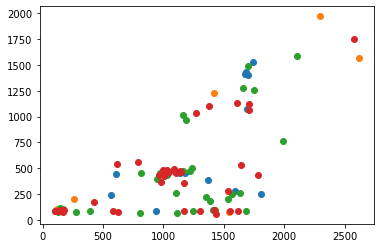

In [68]:
for i in range(len(x)):
    plt.plot((x[i]),(y[i]),'o')

# Prep Your Bivariate KDEs

Use to visualize and modify your bivariate KDEs without plotting the X-Y data.

df3 = df2.loc[sampleList1] creates a new DataFrame (df3) based on your sampleList for KDE 1.

df4 = df2.loc[sampleList2] creates a new DataFrame (df4) based on your sampleList for KDE 2.

fig, ax1 = plt.subplots(figsize=(15,10)) sets up the plot

ax = sns.kdeplot(df3[... computes bivariate KDE 1

ax = sns.kdeplot(df4[... computes bivariate KDE 2

bw = Sets the bandwidth for the bivariate KDE. Use 'scott', 'silverman', or scalar value

cmap = Color map for coloring the contours by density (chooses equally spaced values from 0 to 1). See https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html for color map options.

shade = Color in the contours, True or False

shade_lowest = Shade in the smallest contour interval, True or False

n_level = Select the number of contours

alpha = Select the level of transparency, from 0 to 1.

cbar = Display color bar, True or False


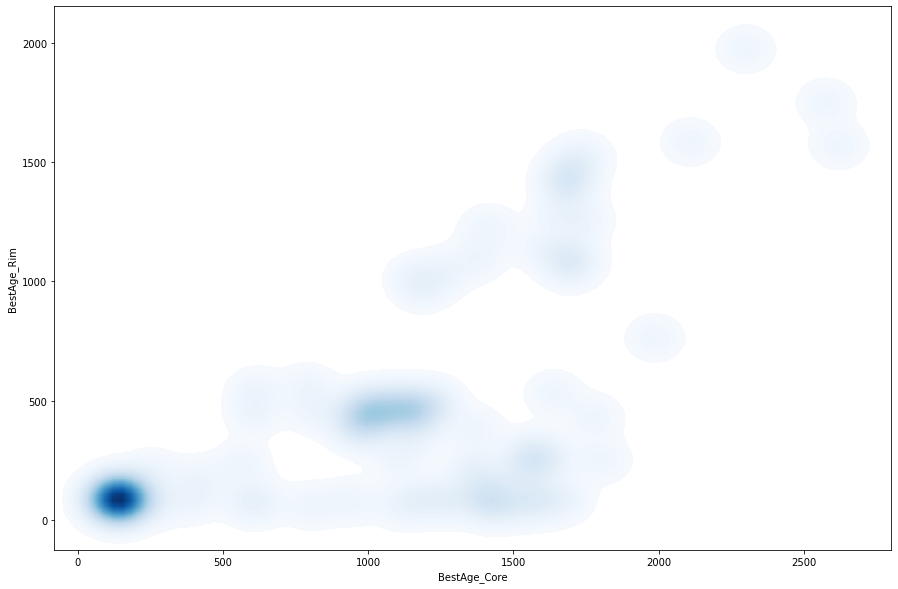

In [69]:
#Use for single KDE over entire X-Y Data
df3 = df2.loc[sampleList]
fig, ax1 = plt.subplots(figsize=(15, 10))
ax = sns.kdeplot(df3['BestAge_Core'], df3['BestAge_Rim'], bw=60, cmap='Blues', shade=True, shade_lowest=False, n_levels=100, alpha=1, cbar=False)

#Use for multiple KDEs of segments of X-Y Data
#df3 = df2.loc[sampleList1]
#df4 = df2.loc[sampleList2]
#fig, ax1 = plt.subplots(figsize=(15, 10))
#ax = sns.kdeplot(df3['BestAge_Core'], df3['BestAge_Rim'], bw=60, cmap='Blues', shade=True, shade_lowest=False, n_levels=10, alpha=0.75, cbar=False)
#ax = sns.kdeplot(df4['BestAge_Core'], df4['BestAge_Rim'], bw=60, cmap='Reds', shade=True, shade_lowest=False, n_levels=10, alpha=0.5, cbar=False)

# Make the final plot

Plot your X-Y data and bivariate KDEs on the same plot, and customize!

df3 = df2.loc[sampleList1]: See Prep your Bivariate KDE section

fig, ax = plt.subplots(figsize=(15, 10)): See Prep your Bivariate KDE section

ax = sns.kdeplot(df3[...]: See Prep your Bivariate KDE section

ax.plot((0,2025),(0,2025), color='black'): Makes a 1:1 U-Pb age line

for in range(len(x)): iterates the following x-y plotting functionality for the entirity of the list x (and y, x_error, y_error)

colors = plt.cm.Set1_r(np.linspace(0,1,len(sampleList))): Automatically assigns a color to your X-Y data from a colormap by sampling at equal spacing along the colormap (from 0 to 1) based on the number of unique values in your sampleList. The colormap in this example is Set1_r (Set 1 in reverse). https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

colors = : Can also be set to specific unique values, e.g., colors = ['red', 'blue'] etc. Do this to match your X-Y colors to your KDE colors

markers = : Set each unique group of X-Y data its own marker style: https://matplotlib.org/3.1.3/api/markers_api.html

labels = : Set your labels for each group X-Y data (equal to your sampleList)

ax.errorbar(...): Plots your error bars for each X-Y point

   linestyle = "" : adjust the line style, "" is typical line

   color = : adjust the line color

   capsize = 0 : No cap on error bar; Make >0 to have a cap

ax.plot( = plots the X-Y data

   marker = : Sets the marker styles to iterate over the markers list defined above
    
   markersize = : Sets markersize using a scalar value
    
   color = : Sets the marker colors to iterate over the colors list defined above
    
   markeredgecolor = black : Set a marker edge color, black is good
    
   alpha = : Sets transparency (0 to 1)
    
   linestyle = ""
    
   label = : Labels the X-Y data by the labels list defined above
    
ax.set_xlim(-50, 2750): Sets the x-axis range

ax.set_ylim(): Sets the y-axis range

ax.set_title(""): Give the plot a Title

ax.set_xlabel(''): Label the x-axis

ax.set_ylabel(''): Label the y-axis

ax.legend(): Makes a legend for X-Y data

ax.spines['top'].set_visible(False): Sets the top or right borders as invisible

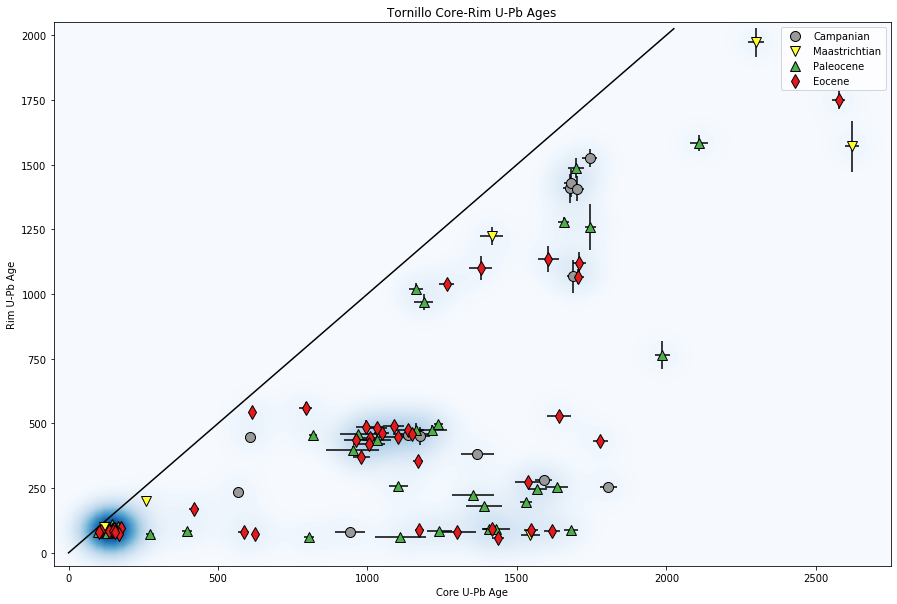

In [70]:
#Plotting the Bivariate KDE
#Single KDE
df3 = df2.loc[sampleList]
fig, ax1 = plt.subplots(figsize=(15, 10))
ax = sns.kdeplot(df3['BestAge_Core'], df3['BestAge_Rim'], bw=60, cmap='Blues', shade=True, shade_lowest=True, n_levels=100, alpha=1, cbar=False)

#Multiple KDEs
#df3 = df2.loc[sampleList1]
#df4 = df2.loc[sampleList2]
#fig, ax = plt.subplots(figsize=(15, 10))
#ax = sns.kdeplot(df3['BestAge_Core'], df3['BestAge_Rim'], bw=60, cmap='Blues', shade=True, shade_lowest=False, n_levels=10, alpha=0.75, cbar=False)
#ax = sns.kdeplot(df4['BestAge_Core'], df4['BestAge_Rim'], bw=60, cmap='Reds', shade=True, shade_lowest=False, n_levels=10, alpha=0.5, cbar=False)

#Make 1:1 line
ax.plot((0,2025),(0,2025), color='black')

#Plotting the X-Y Data
for i in range(len(x)):
    colors = plt.cm.Set1_r(np.linspace(0,1,len(sampleList)))
    #colors = ['blue', 'blue', 'red', 'red']
    markers = ['o','v','^','d','P','p','X']
    labels = ['Campanian', 'Maastrichtian', 'Paleocene', 'Eocene']
    ax.errorbar((x[i]), (y[i]), xerr=(X_error[i]), yerr=(Y_error[i]), linestyle="", color='black', capsize=0)
    ax.plot((x[i]), (y[i]), marker=(markers[i]), markersize=10, color=(colors[i]), markeredgecolor='black', alpha=1, linestyle="", label=(labels[i]))
    ax.set_xlim(-50, 2750)
    ax.set_ylim(-50, 2050)
    
# Label plot
ax.set_title ("Tornillo Core-Rim U-Pb Ages")
ax.set_xlabel('Core U-Pb Age')
ax.set_ylabel('Rim U-Pb Age')
ax.legend()

#Gets rid of top and right borders if you want
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

#plt.show()

# Export Your New Figure

Execute the two cells below to create a fully editable .pdf. You only need to import pathlib once.

pathlib.Path('Output') will create an Output folder on your hard drive wherever your default Jupyter Notebook location is

fig.savefig('') saves the .pdf. Note it will not prompt you if a figure of the same name exists. It will just overwrite.

In [45]:
import pathlib

In [33]:
pathlib.Path('Output').mkdir(parents=True, exist_ok=True) # Recursively creates the directory and does not raise an exception if the directory already exists 
fig.savefig('Output/Tornillo_Core_Rim_Jr_KPg.pdf')